In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
df_agent1 = pd.read_csv("./final-results_1/agent1_results.csv")
df_agent2 = pd.read_csv("./final-results_2/agent2_results.csv")

In [35]:
df_agent1.head()

,Unnamed: 0,src/tcc.c,src/tcctools.c,src/libtcc.c,src/i386-asm.c,src/x86_64-link.c,src/x86_64-gen.c,src/tccrun.c,src/tccelf.c,src/tccasm.c,src/tccdbg.c,src/tccgen.c,src/tccpp.c,include/tcc.h,total_coverage
0,Iteration 0,55.24,0.0,38.60,0.00,0.0,34.44,2.22,18.59,0.00,8.54,45.64,63.21,39.62,33.34
1,Iteration 1,55.24,0.0,38.71,40.64,0.0,37.34,2.22,18.59,22.72,8.78,49.03,65.02,39.62,38.64
2,Iteration 2,55.24,0.0,38.71,40.64,0.0,39.26,2.22,18.59,22.72,8.78,51.58,65.88,39.62,39.75
3,Iteration 3,55.24,0.0,38.71,40.64,0.0,39.26,2.22,18.59,22.72,8.78,51.62,65.88,39.62,39.76
4,Iteration 4,55.24,0.0,38.71,40.64,0.0,51.01,2.22,18.59,22.72,8.78,55.36,67.25,43.40,42.09


In [36]:
df_agent2.head()

,Unnamed: 0,src/tcc.c,src/tcctools.c,src/libtcc.c,src/i386-asm.c,src/x86_64-link.c,src/x86_64-gen.c,src/tccrun.c,src/tccelf.c,src/tccasm.c,src/tccdbg.c,src/tccgen.c,src/tccpp.c,include/tcc.h,total_coverage
0,Iteration 0,55.24,0.0,38.38,0.00,0.0,35.32,2.22,18.59,0.00,8.54,46.72,62.91,33.96,33.67
1,Iteration 1,55.24,0.0,38.38,38.99,0.0,43.03,2.22,18.59,22.36,8.78,52.14,63.94,39.62,39.77
2,Iteration 2,55.24,0.0,38.38,38.99,0.0,43.03,2.22,18.59,22.36,8.78,53.03,64.50,39.62,40.15
3,Iteration 3,55.24,0.0,38.60,38.99,0.0,52.32,2.22,18.59,22.36,9.02,56.08,67.17,39.62,42.29
4,Iteration 4,55.24,0.0,38.60,38.99,0.0,59.86,2.22,18.59,22.36,9.02,58.04,67.90,39.62,43.60


In [53]:
def plot_coverage_from_dataframe(df, columns_to_plot):
    """
    Plots coverage over iterations from a dataframe for selected columns.

    Parameters:
    df (pd.DataFrame): The dataframe containing coverage data.
                       The index should represent iterations.
    columns_to_plot (list): List of column names (str) to plot.
                            Include 'total_coverage' if desired.
    """
    plt.figure(figsize=(12, 6))
    
    for column in columns_to_plot:
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in DataFrame.")
            continue
        
        if column == 'total_coverage':
            plt.plot(df.index, df[column], label=column, color='black', linewidth=2.5)
        else:
            plt.plot(df.index, df[column], label=column)

    plt.title("Coverage Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Coverage (%)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [56]:
df_agent1_dropped = df_agent1.drop(columns=['Unnamed: 0', 'src/tcctools.c', 'src/x86_64-link.c', 'src/libtcc.c', 'src/tccrun.c', 'src/tccdbg.c', 'src/tccelf.c'], axis=1)
df_agent2_dropped = df_agent2.drop(columns=['Unnamed: 0', 'src/tcctools.c', 'src/x86_64-link.c', 'src/libtcc.c', 'src/tccrun.c', 'src/tccdbg.c', 'src/tccelf.c'], axis=1)

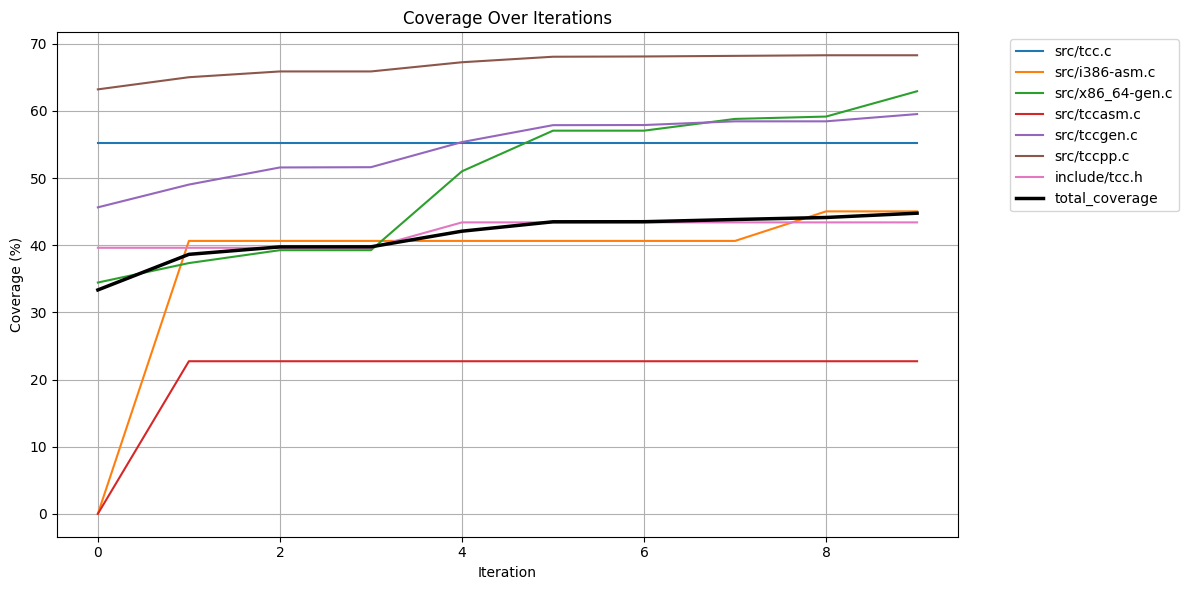

In [57]:
plot_coverage_from_dataframe(df_agent1_dropped, df_agent1_dropped.columns)

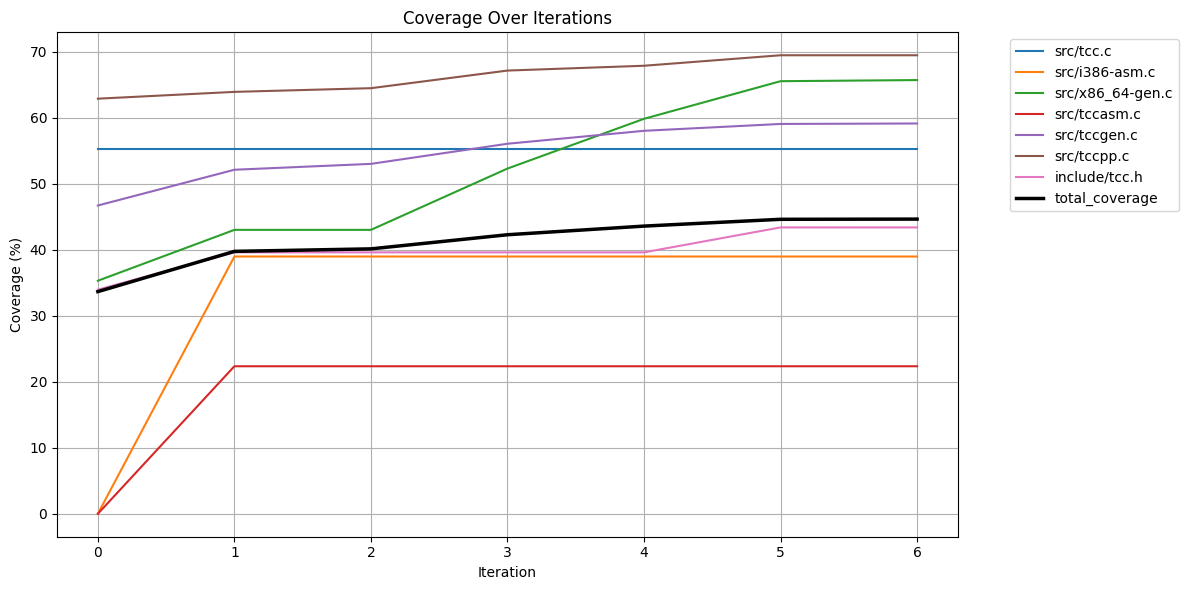

In [55]:
plot_coverage_from_dataframe(df_agent2_dropped, df_agent2_dropped.columns)